<a href="https://colab.research.google.com/github/sakshamceo/Twitter-Sentiment-Analysis_Project_NLP/blob/main/Visualizing_tweets_and_the_Logistic_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import nltk                      
from os import getcwd
import pandas as pd              
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt    
import numpy as np                  


In [10]:

nltk.download('twitter_samples')
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)


train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg 

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


In [12]:

from google.colab import files
  
uploaded = files.upload()

Saving logistic_features.csv to logistic_features.csv


In [13]:
data = pd.read_csv('logistic_features.csv'); 
data.head(10) 

bias  positive  negative  sentiment
0   1.0    3020.0      61.0        1.0
1   1.0    3573.0     444.0        1.0
2   1.0    3005.0     115.0        1.0
3   1.0    2862.0       4.0        1.0
4   1.0    3119.0     225.0        1.0
5   1.0    2955.0     119.0        1.0
6   1.0    3934.0     538.0        1.0
7   1.0    3162.0     276.0        1.0
8   1.0     628.0     189.0        1.0
9   1.0     264.0     112.0        1.0

Text(0, 0.5, 'Negative')

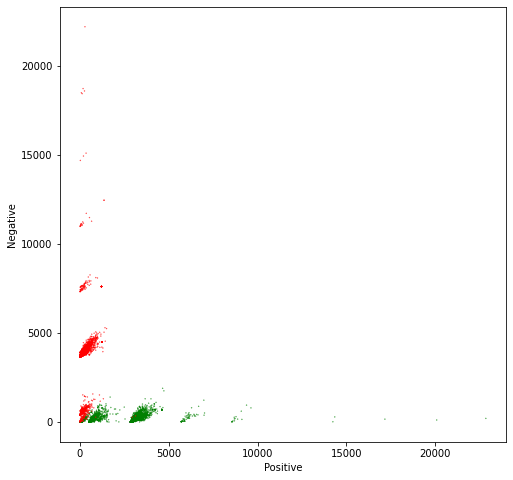

In [16]:

X = data[['bias', 'positive', 'negative']].values 
Y = data['sentiment'].values; 
theta = [7e-08, 0.0005239, -0.00055517]

fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  
plt.xlabel("Positive")
plt.ylabel("Negative")

In [17]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

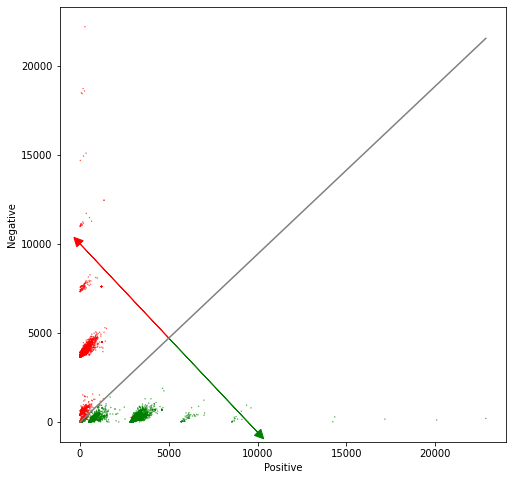

In [18]:

fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']


ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

 
maxpos = np.max(X[:,1])

offset = 5000 


ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()